# ETC
#### 먼저 explore하고 , 그 다음 가장 평균 높은 arm 계속 exploit

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

### ETC CLASS

In [2]:
class ETC : 
    def __init__(self):
        self.expected_optimal = [] # 뽑힌 arm이 무엇인지 쭉 들어갈 것임
        
    def exploration(self,t,N): #time, arm의 갯수
        # choose action t mod N
        action_choose = t%N # arm이 5 개이면 0,1,2,3,4,0,1,2,3,4,.. 이렇게 explore
        return action_choose
    
    def exploitation(self,t,reward_observation):
        estimate = np.mean(reward_observation,axis=0) #reward평균 저장되어 있고
        self.expected_optimal = np.argmax(estimate) #최적의 arm골라서 
        return self.expected_optimal
    
def env(action_choose, true_reward,error):
    reward = true_reward[action_choose] + error
    return reward
        

### ETC simulation

In [3]:
def simulation_ETC(N,T,m,true_reward, R):
       # arm갯수,총 몇 번 당길것인지, explore 때 한 arm당 몇번 당길 것인지, mu_i, sigma
    etc = ETC() #class instance 초기화
    Regret = np.zeros((T,1)) # 당기는 횟수만큼 regret 0으로 초기화
    reward_observe = np.zeros((m,N)) #각 arm별로 m번 당겼을 때를 행으로, 열은 arm 모아놓은 matrix
    optimal = np.argmax(true_reward) #i* 즉 mu_i가 가장 큰 index 내줌
    
    for t in range(T):
        if t <m*N: # Explore : 각 arm마다 m번씩 당기기
            action_choose = etc.exploration(t,N)
            error = np.random.normal(0,R)
            reward_observe[t//N,t%N] = env(action_choose, true_reward,error)
            # reward_observe Matrix의 각 arm별로 t 시점에서 reward 저장
            
        # if we did not choose optimal action yet
        # 위에서 탐색한 것을 기반으로 가장 좋은 arm의 index 최적의 arm을 담는 list 만들기
        elif not etc.expected_optimal:
            action_choose = etc.exploitation(t,reward_observe)
            
        # exploit optimal action
        else:
            action_choose = etc.expected_optimal
        
        # t시점에서 기회비용
        regret = true_reward[optimal] - true_reward[action_choose]
        # cf. Regret : 누적 기회비용
        
        if t == 0:
            Regret[t] = regret
        else:
            Regret[t] = Regret[t-1] + regret
            
    return Regret
    
    

# UCB

In [4]:
class UCB:
    def __init__(self,T,N):
        self.reward_store = np.zeros((T,N))
    
    def exploration(self,t): # 먼저 한번 씩 당겨서 탐색
        action_choose = t
        return action_choose
    
    def find_action(self,N,alpha):
        selected_number = np.count_nonzero(self.reward_store,axis = 0)
        bound = np.sum(self.reward_store,axis = 0)/selected_number + np.sqrt(alpha*(1/selected_number))
        action_choose = np.argmax(bound)
        
        return action_choose
    
    def update(self,t,reward_observe,action_choose):
        self.reward_store[t,action_choose] = reward_observe
        
def env(action_choose, true_reward,error):
    reward = true_reward[action_choose] + error
    return reward
        

In [5]:
def simulation_UCB(N,T,true_reward,R):
    Regret = np.zeros((T,1))
    optimal = np.argmax(true_reward)
    delta = 0.05
    alpha = 2*R**2*np.log(1/delta) # use for upper confidence bound
    ucb = UCB(T,N)
    
    for t in range(T):
        #먼저 한번씩은 당겨
        if t < N:
            action_choose = ucb.exploration(t)
        else:
            action_choose = ucb.find_action(N,alpha)
            
        #observe reward
        error = np.random.normal(0,R)
        reward_observe = env(action_choose, true_reward,error)
        
        ucb.update(t,reward_observe, action_choose)
        regret = true_reward[optimal] - true_reward[action_choose]
        
        if t == 0:
            Regret[t] = regret
        else:
            Regret[t] = Regret[t-1] + regret
            
    return Regret

# simulation
## ETC

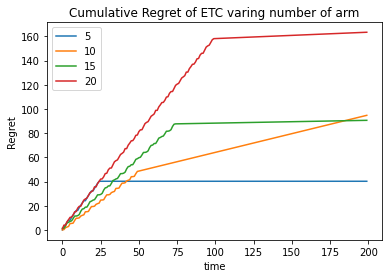

In [6]:
T = 200
m = 5
R = 1 #sigma
number_of_arm = [5,10,15,20]
for N in (number_of_arm):
    true_reward = np.random.rand(N,1)*3
    Regret = simulation_ETC(N,T,m,true_reward, R)
    time = np.linspace(0,T-1,T)
    plt.plot(time,Regret)
    
plt.legend(number_of_arm)
plt.title('Cumulative Regret of ETC varing number of arm')
plt.xlabel('time')
plt.ylabel('Regret')
plt.show()

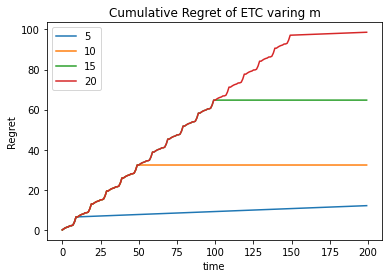

In [7]:
T = 200
R = 1 #sigma
N=10
true_reward = np.random.rand(N,1)*3
selecting_times = [1, 5,10,15]
for m in selecting_times:
    Regret = simulation_ETC(N,T,m,true_reward, R)
    time = np.linspace(0,T-1,T)
    plt.plot(time,Regret)
    
plt.legend(number_of_arm)
plt.title('Cumulative Regret of ETC varing m')
plt.xlabel('time')
plt.ylabel('Regret')
plt.show()

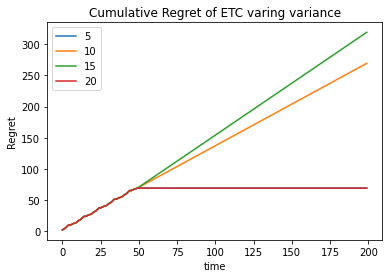

In [8]:
T = 200
m = 5
N=10
number_of_arm = [5,10,15,20]
true_reward = np.random.rand(N,1)*3
varying_set = [1,1.5,3,5]

for R in (varying_set):
    Regret = simulation_ETC(N,T,m,true_reward, R)
    time = np.linspace(0,T-1,T)
    plt.plot(time,Regret)
    
plt.legend(number_of_arm)
plt.title('Cumulative Regret of ETC varing variance')
plt.xlabel('time')
plt.ylabel('Regret')
plt.show()

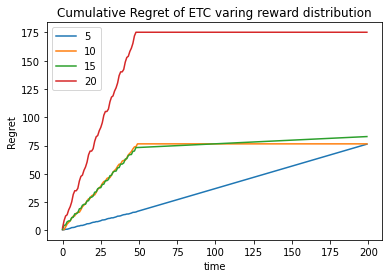

In [9]:
#just 참고
T = 200
N=10
m = 5
R = 1 #sigma
varying_set = [1,3,5,7]

for i in (varying_set):
    true_reward = np.random.rand(N,1)*i
    Regret = simulation_ETC(N,T,m,true_reward, R)
    time = np.linspace(0,T-1,T)
    plt.plot(time,Regret)
    
plt.legend(number_of_arm)
plt.title('Cumulative Regret of ETC varing reward distribution')
plt.xlabel('time')
plt.ylabel('Regret')
plt.show()

# simulation
## UCB

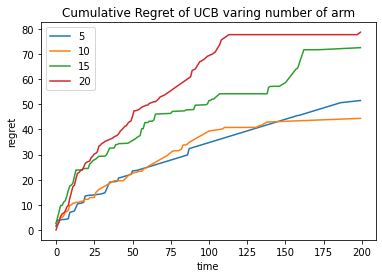

In [10]:
T = 200
R = 1 #sigma
varying_set = [5,10,15,20]
for N in (varying_set):
    true_reward = np.random.rand(N,1)*3
    regret = simulation_UCB(N,T,true_reward,R)
    time = np.linspace(0,T-1,T)
    plt.plot(time,regret)
    
plt.legend(varying_set)
plt.title('Cumulative Regret of UCB varing number of arm')
plt.xlabel('time')
plt.ylabel('regret')
plt.show()

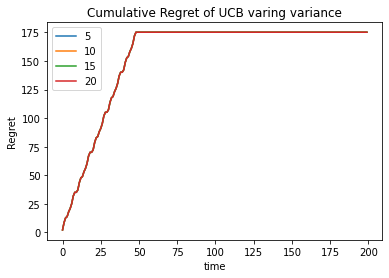

In [11]:
T = 200
N=10
true_reward = np.random.rand(N,1)*3
varying_set = [1, 1.5,3,5]
for R in varying_set:
    regret = simulation_UCB(N,T,true_reward,R)
    time = np.linspace(0,T-1,T)
    plt.plot(time,Regret)
    
plt.legend(number_of_arm)
plt.title('Cumulative Regret of UCB varing variance')
plt.xlabel('time')
plt.ylabel('Regret')
plt.show()

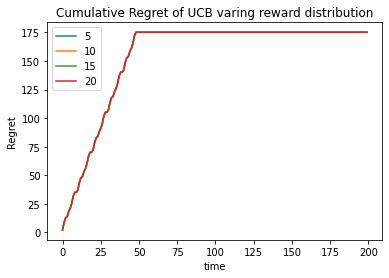

In [12]:
#just 참고
T = 200
N=10
R = 1 #sigma
varying_set = [1,3,5,7]

for i in (varying_set):
    true_reward = np.random.rand(N,1)*i
    regret = simulation_UCB(N,T,true_reward,R)
    time = np.linspace(0,T-1,T)
    plt.plot(time,Regret)
    
plt.legend(number_of_arm)
plt.title('Cumulative Regret of UCB varing reward distribution')
plt.xlabel('time')
plt.ylabel('Regret')
plt.show()